In [1]:
import galsim
import galsim_hub
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
STAMP_SIZE = 128
PIXEL_SCALE = 0.03

In [3]:
# Loads COSMOS sample
cosmos_cat = galsim.COSMOSCatalog()

# Loads model for flow-vae
model = galsim_hub.GenerativeGalaxyModel('modules/flow_vae_maf_16/generator')

# Noise model
cosmos_noise = galsim.getCOSMOSNoise()

/gpfslocalsup/pub/anaconda-py3/2019.03/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


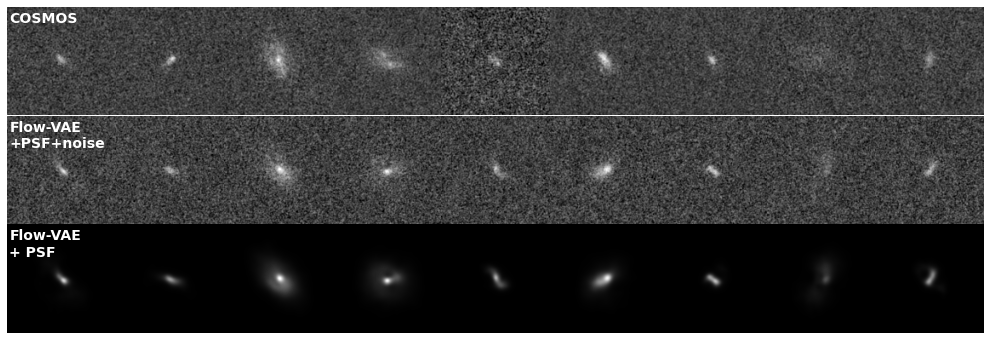

In [6]:
figure(figsize=(17.5,6))
for i in range(9):
    im_real = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim_n = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    
    # Drawing galaxy from cosmos
    gal = cosmos_cat.makeGalaxy(i, gal_type='real', noise_pad_size=0.8*STAMP_SIZE*PIXEL_SCALE)
    psf = gal.original_psf
    real = galsim.Convolve(psf, gal)
    real.drawImage(im_real, method='no_pixel');
    
    # Drawing galaxy from generative model
    params = cosmos_cat.param_cat[cosmos_cat.orig_index][['flux_radius', 'mag_auto', 'zphot']][i:i+1]
    sim_gal = model.sample(params)
    sim = galsim.Convolve(psf, sim_gal)
    sim.drawImage(im_sim, method='no_pixel');
    sim.drawImage(im_sim_n, method='no_pixel');
    im_sim_n.addNoise(cosmos_noise)
    
    subplot(3,9,i+1)
    imshow(arcsinh(50*im_real.array)/50, cmap='gray',vmin=-0.01,vmax=0.03)
    axis('off')
    if i==0:
        text(2, 5, "COSMOS", verticalalignment='top', fontsize=14, color="white", weight="bold")
    
    subplot(3,9,i+1+9)
    imshow(arcsinh(50*im_sim_n.array)/50, cmap='gray',vmin=-0.01,vmax=0.03)   
    axis('off')
    if i==0:
        text(2, 5, "Flow-VAE\n+PSF+noise", verticalalignment='top', fontsize=14, color="white", weight="bold")
    
    subplot(3,9,i+1+18)
    imshow(arcsinh(50*im_sim.array)/50, cmap='gray',vmin=0.0,vmax=0.03)   
    axis('off')
    if i==0:
        text(2, 5, "Flow-VAE\n+ PSF", verticalalignment='top', fontsize=14, color="white", weight="bold")

plt.subplots_adjust(wspace=0, hspace=0)
savefig('Figures/Figure1.pdf',bbox_inches='tight')

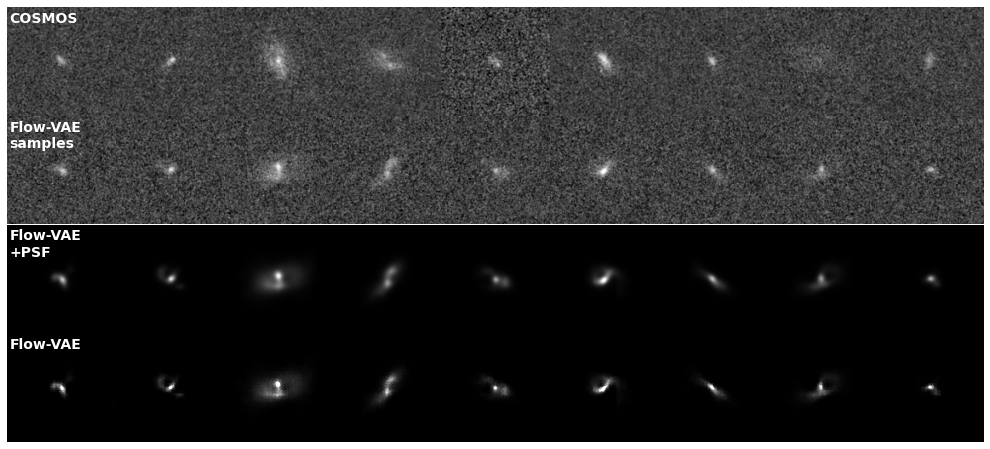

In [7]:
figure(figsize=(17.5,8))
for i in range(9):
    im_real = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim_p = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    im_sim_n = galsim.ImageF(STAMP_SIZE, STAMP_SIZE, scale=PIXEL_SCALE)
    
    # Drawing galaxy from cosmos
    gal = cosmos_cat.makeGalaxy(i, gal_type='real', noise_pad_size=0.8*STAMP_SIZE*PIXEL_SCALE)
    psf = gal.original_psf
    real = galsim.Convolve(psf, gal)
    real.drawImage(im_real, method='no_pixel');
    
    # Drawing galaxy from generative model
    params = cosmos_cat.param_cat[cosmos_cat.orig_index][['flux_radius', 'mag_auto', 'zphot']][i:i+1]
    sim_gal = model.sample(params)
    sim = galsim.Convolve(psf, sim_gal)
    sim_gal.drawImage(im_sim, method='no_pixel');
    
    sim.drawImage(im_sim_p, method='no_pixel');
    
    sim.drawImage(im_sim_n, method='no_pixel');
    im_sim_n.addNoise(cosmos_noise)
    
    subplot(4,9,i+1)
    imshow(arcsinh(50*im_real.array)/50, cmap='gray',vmin=-0.01,vmax=0.03)
    axis('off')
    if i==0:
        text(2, 5, "COSMOS", verticalalignment='top', fontsize=14, color="white", weight="bold")
    
    subplot(4,9,i+1+9)
    imshow(arcsinh(50*im_sim_n.array)/50, cmap='gray',vmin=-0.01,vmax=0.03)   
    axis('off')
    if i==0:
        text(2, 5, "Flow-VAE\nsamples", verticalalignment='top', fontsize=14, color="white", weight="bold")
        
    subplot(4,9,i+1+18)
    imshow(arcsinh(50*im_sim_p.array)/50, cmap='gray',vmin=0.0,vmax=0.03)   
    axis('off')
    if i==0:
        text(2, 5, "Flow-VAE\n+PSF", verticalalignment='top', fontsize=14, color="white", weight="bold")
    
    subplot(4,9,i+1+27)
    imshow(arcsinh(50*im_sim.array)/50, cmap='gray',vmin=0.0,vmax=0.03)   
    axis('off')
    if i==0:
        text(2, 5, "Flow-VAE", verticalalignment='top', fontsize=14, color="white", weight="bold")
    
plt.subplots_adjust(wspace=0, hspace=0)